In [16]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
iris = load_iris()
iris_df = pd.DataFrame(columns=iris['feature_names'], data=iris['data'])
iris_df['name'] = [iris['target_names'][i] for i in iris['target']]

In [47]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [29]:
# compute mean of all numeric columns for each name
iris_means_df  = iris_df.groupby('name').mean()
iris_means_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
name,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


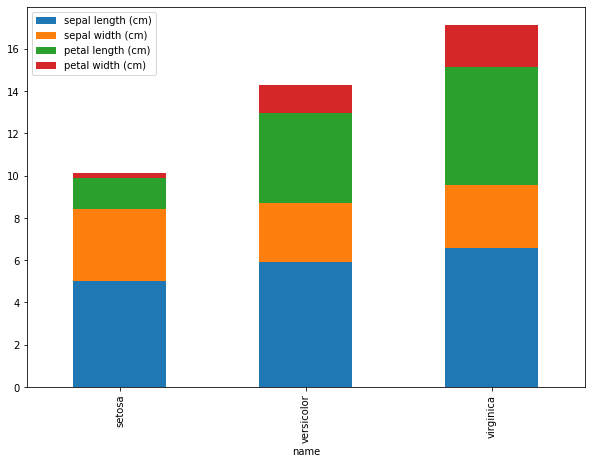

In [31]:
iris_means_df.plot.bar(stacked=True, figsize=(10,7))

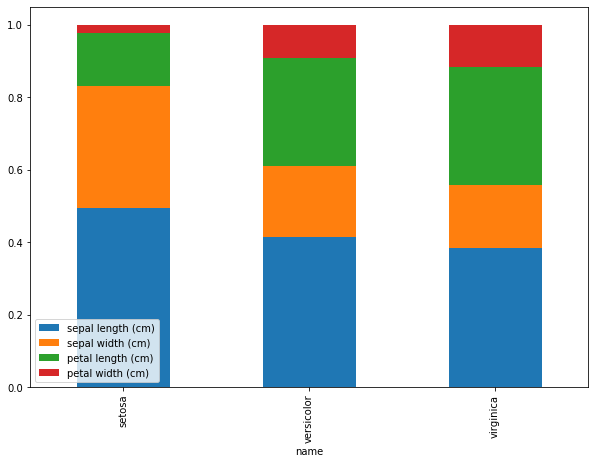

In [38]:
iris_means_df.div(iris_means_df.sum(axis=1), axis=0).plot.bar(stacked=True, figsize=(10,7))

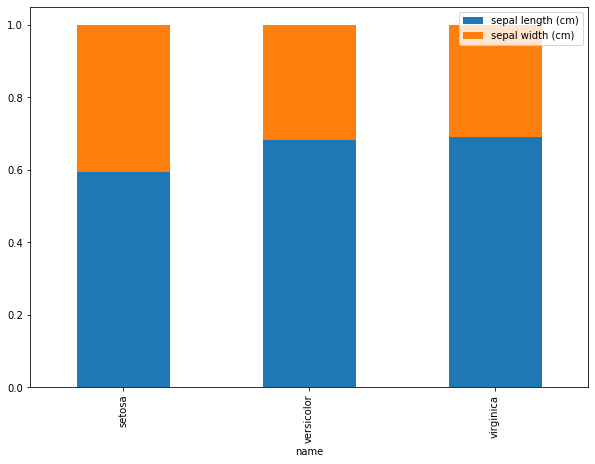

In [40]:
cols = ['sepal length (cm)', 'sepal width (cm)']

iris_means_df[cols].div(iris_means_df[cols].sum(axis=1), axis=0).plot.bar(stacked=True, figsize=(10,7))

In [50]:
iris_df = iris_df.set_index('name')
agg = {i: np.std for i in iris_df.columns}
iris_sd_df  = iris_df.groupby(level=0).agg(agg)

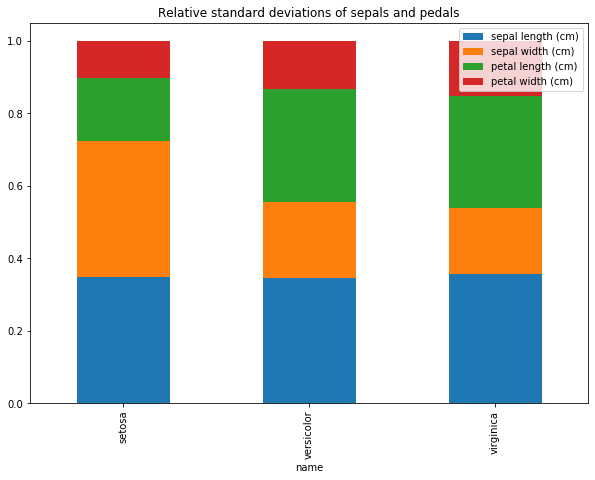

In [57]:
iris_sd_df.div(iris_sd_df.sum(axis=1), axis=0).plot.bar(stacked=True, figsize=(10,7))
plt.title('Relative standard deviations of sepals and pedals')
plt.show()

In [59]:
from sklearn.decomposition.pca import PCA

In [62]:
iris_pca = PCA(n_components=2).fit_transform(iris_df)

In [77]:
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

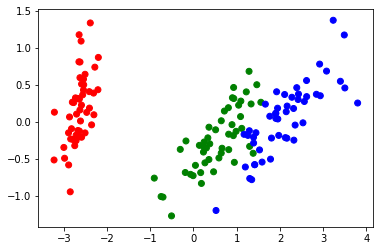

In [82]:
plt.scatter(*iris_pca.T, color=[colors[x] for x in iris_df.index])